In [98]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [12]:
# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv", 
                 names=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 
                        'DiabetesPedigreeFunction', 'Age', 'Outcome'])


# Display first 5 rows
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 2.Data Exploration
finding the shape,nullvalues,describe


In [19]:
print("shape of dataset",df.shape)
print(df.isnull().sum())
print("\n summary statistics \n")
print(df.describe())

shape of dataset (768, 9)
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

 summary statistics 

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000

In [22]:
print(df["Outcome"].value_counts())

Outcome
0    500
1    268
Name: count, dtype: int64


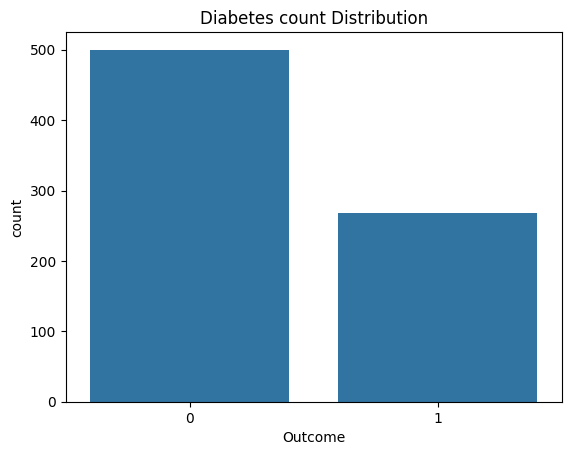

In [27]:
sns.countplot(x="Outcome",data=df)
plt.title("Diabetes count Distribution")
plt.show()

In [30]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [65]:
required_columns=["Pregnancies","Glucose","BloodPressure","Outcome"]
df[required_columns].head()

,Pregnancies,Glucose,BloodPressure,Outcome
0,6,148,72,1
1,1,85,66,0
2,8,183,64,1
3,1,89,66,0
4,0,137,40,1


In [61]:
#to get usnique Values
df["Pregnancies"].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14])

In [62]:
pregnancy_outcome=df.groupby("Pregnancies")["Outcome"].mean()
pregnancy_outcome

Pregnancies
0     0.342342
1     0.214815
2     0.184466
3     0.360000
4     0.338235
5     0.368421
6     0.320000
7     0.555556
8     0.578947
9     0.642857
10    0.416667
11    0.636364
12    0.444444
13    0.500000
14    1.000000
15    1.000000
17    1.000000
Name: Outcome, dtype: float64

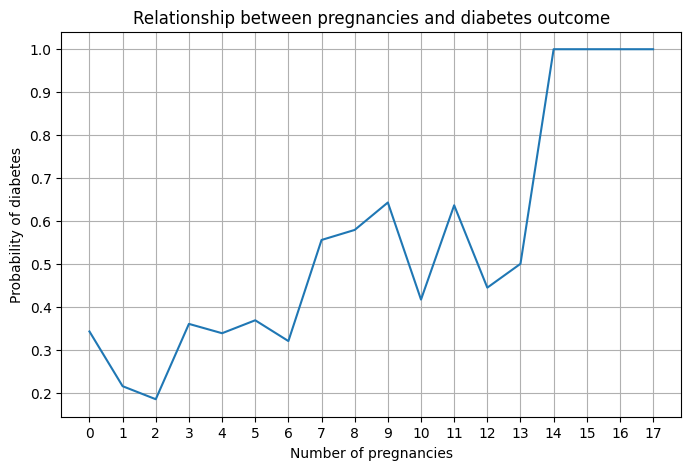

In [72]:

plt.figure(figsize=(8,5))

sns.lineplot(x=pregnancy_outcome.index,y=pregnancy_outcome.values)
plt.xlabel("Number of pregnancies")
plt.ylabel("Probability of diabetes")
plt.title("Relationship between pregnancies and diabetes outcome")
plt.xticks(range(0,max(df["Pregnancies"])+1))
plt.grid()
plt.show()

Understanding the relationship between features and Diabetes 
## Relation between Glucose Levels and Diabetes Outcome 

C:\Users\nagas\AppData\Local\Temp\ipykernel_10076\467249989.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Outcome",y="Glucose",data=df,palette=["green","red"])


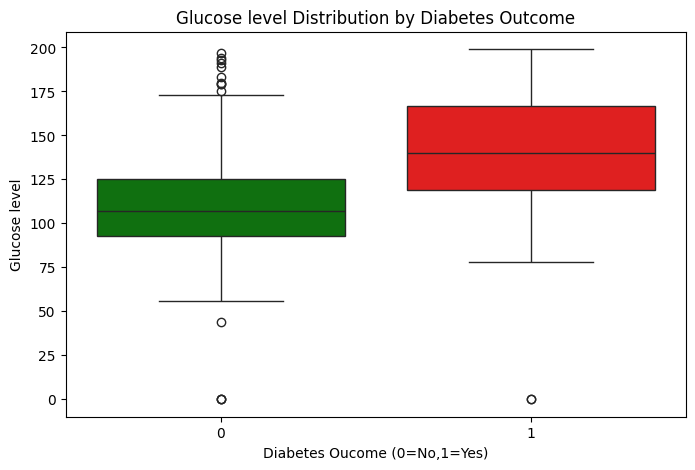

In [79]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Outcome",y="Glucose",data=df,palette=["green","red"])
plt.xlabel("Diabetes Oucome (0=No,1=Yes)")
plt.ylabel("Glucose level")
plt.title("Glucose level Distribution by Diabetes Outcome")
plt.show()

Analyzing the Distribution for Each Outcome:
Outcome = 0 (Non-diabetic, Green Box):
Median Glucose Level: The middle line in the green box shows the median glucose level for non-diabetic individuals.
Range:
Most glucose levels lie between ~75 and ~125 (interquartile range, IQR).
Outliers exist below 50 and above 150.
Spread: The box and whiskers indicate less variation in glucose levels for non-diabetic individuals.
Outcome = 1 (Diabetic, Red Box):
Median Glucose Level: The median glucose level is significantly higher than for non-diabetic individuals, around ~140.
Range:
Most glucose levels lie between ~110 and ~175 (IQR).
A broader spread compared to non-diabetics.
Outliers: A few outliers are present below 75.


### Higher Higher glucose levels indicate poor insulin function, leading to diabetes.
 ### A box plot helps compare glucose levels distribution for diabetics vs. non-diabetics.

## Relation Between BMI and Diabetes Outcome

Obesity (higher BMI) is a major risk factor for diabetes.
A violin plot shows both distribution and density of BMI values.

C:\Users\nagas\AppData\Local\Temp\ipykernel_10076\1416575093.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Outcome",y="BMI",data=df,palette=["blue","orange"])


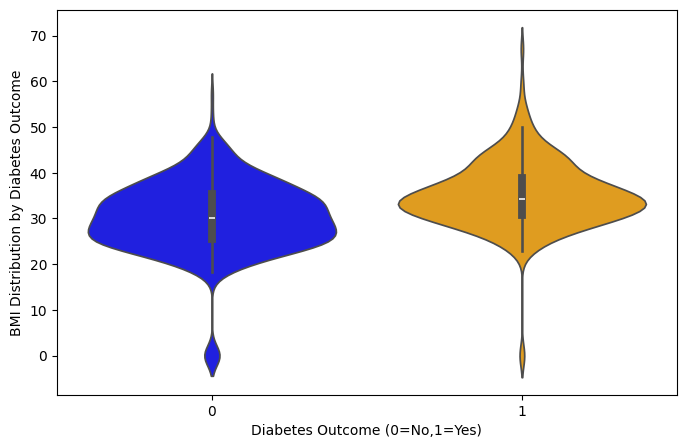

In [84]:
plt.figure(figsize=(8,5))
sns.violinplot(x="Outcome",y="BMI",data=df,palette=["blue","orange"])
plt.xlabel("Diabetes Outcome (0=No,1=Yes)")
plt.ylabel("BMI Distribution by Diabetes Outcome")
plt.show()


In [86]:
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Key Insights
Higher BMI is Associated with Diabetes:

The median BMI for the diabetic group is higher than for the non-diabetic group.
This suggests that individuals with higher BMI are more likely to develop diabetes, consistent with medical research linking obesity to diabetes.
Spread of BMI:

Both groups have a wide range of BMI values.
The diabetic group shows slightly more extreme values (higher BMI).
4️⃣ Why Use a Violin Plot?
Detailed Distribution: Unlike a boxplot, the violin plot shows the full density distribution of BMI values, not just the summary statistics (median, IQR).
Comparative Insights: The shape and spread of each violin help identify where the values are concentrated for each group.
5️⃣ Conclusion
This violin plot effectively shows that BMI is a significant feature for predicting diabetes. Individuals with higher BMI values have a higher likelihood of being diabetic, as evidenced by the shift in the density and median.

Would you like assistance in interpreting more relationships or performing feature engineering for diabetes prediction?










## Correlation between All Features and Outcome

A heatmap shows which features are highly related to diabetes.
Helps in feature selection for machine learning models.

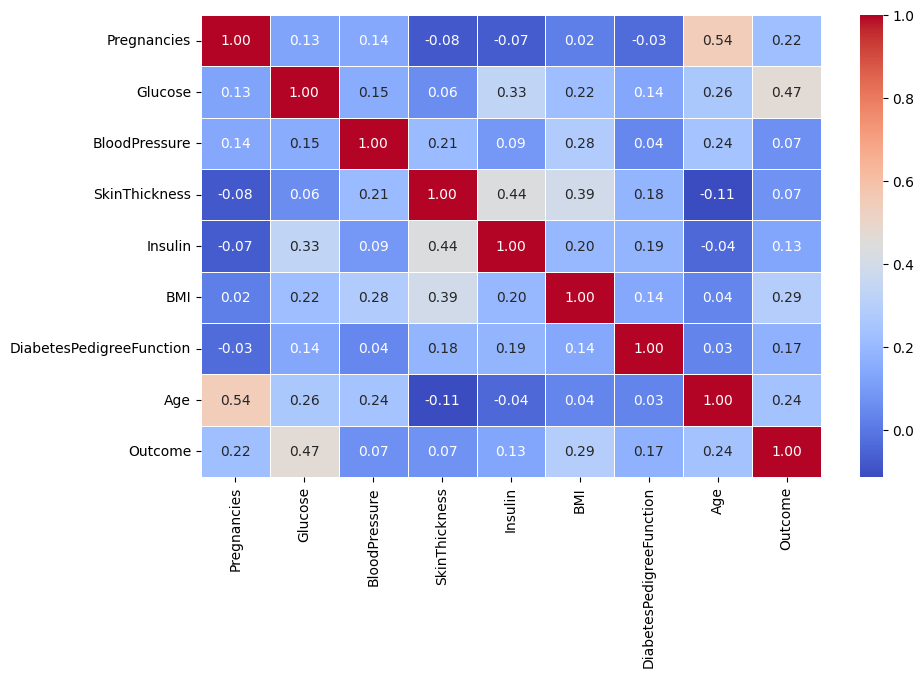

In [87]:
corr_matrix=df.corr() 
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm",fmt=".2f",linewidth=0.5)
plt.show()

Glucose (0.47) and BMI (0.29) have strong positive correlations with diabetes.
Pregnancies (0.22) also show a moderate correlation.

In [ ]:
Feature	Relationship with Diabetes	Best Visualization
Pregnancies	More pregnancies → Higher risk	Line Plot
Glucose	High glucose → Strongly linked to diabetes	Box Plot
BMI	High BMI → Higher risk of diabetes	Violin Plot
All Features	Glucose, BMI, Pregnancies are key factors	Correlation Heatmap


In [92]:
# Replacing zero values in certain columns (zero is invalid for these)
cols_to_replace=["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
for col in cols_to_replace:
    df[col]=df[col].replace(0,df[col].median())

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


## Data Splitting

In [96]:
x=df.drop("Outcome",axis=1)
y=df["Outcome"]
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,30.5,33.6,0.627,50
1,1,85,66,29,30.5,26.6,0.351,31
2,8,183,64,23,30.5,23.3,0.672,32
3,1,89,66,23,94.0,28.1,0.167,21
4,0,137,40,35,168.0,43.1,2.288,33


In [100]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=101)


## Feature Scaling 


In [102]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## Train Logistic Regression Model

In [104]:
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [105]:
y_pred=model.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1])

## Model Evaluation

Model Accuracy 0.7857142857142857


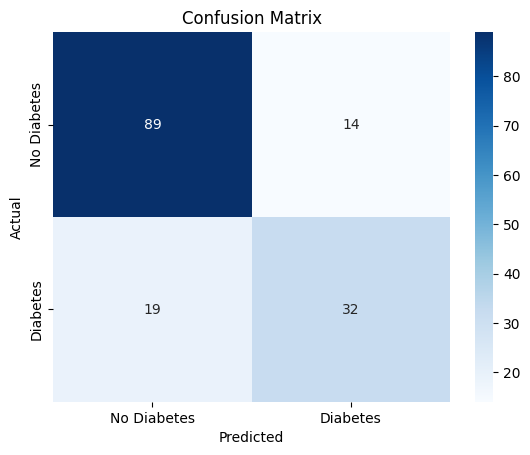

In [109]:
accuracy=accuracy_score(Y_test,y_pred)
print("Model Accuracy",accuracy)

conf_matrix=confusion_matrix(Y_test,y_pred)
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Blues",xticklabels=["No Diabetes","Diabetes"],yticklabels=["No Diabetes","Diabetes"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:

This confusion matrix visualizes the performance of a classification model predicting diabetes. Here's how to analyze it:

Structure of the Confusion Matrix
Axes Labels:

X-axis (Predicted): Model's predictions (No Diabetes and Diabetes).
Y-axis (Actual): True labels (No Diabetes and Diabetes).
Matrix Cells:

Top-left (True Negatives, TN): 89 (correctly predicted No Diabetes).
Top-right (False Positives, FP): 14 (incorrectly predicted Diabetes for non-diabetic individuals).
Bottom-left (False Negatives, FN): 19 (missed predictions of Diabetes).
Bottom-right (True Positives, TP): 32 (correctly predicted Diabetes).
Performance Metrics
Accuracy:

The model performs well for predicting No Diabetes (high True Negatives: 89).
Good overall accuracy (78.57%).
Weaknesses:

Lower precision and recall for predicting Diabetes:
14 False Positives: Some non-diabetic individuals are wrongly classified as diabetic.
19 False Negatives: Missed diabetic individuals.
Real-World Impact:

False Negatives (FN): More critical as it means missing diabetic cases, which could delay treatment.
False Positives (FP): Less severe but could lead to unnecessary medical tests.


## Predicting for a new Patient

In [111]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [126]:
new_patient=np.array([[0,90,120,35,120,100,0.627,20]])
# new_patient = np.array([[30, 85, 110, 28, 95, 90, 0.5, 15]])

new_patient=scaler.transform(new_patient)
prediction =model.predict(new_patient)
print(prediction
     )
print("Diabeted Prediction:","Diabetic" if prediction[0]==1 else "Not Diabetic")

[1]
Diabeted Prediction: Diabetic
